In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [49]:
# Mengimport data mnist dan membaginya menjadi data latih dan data uji
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [50]:
print("X train : ", X_train.shape)
print("y train : ", y_train.shape)
print("X test : ", X_test.shape)
print("y test : ", y_test.shape)

X train :  (60000, 28, 28)
y train :  (60000,)
X test :  (10000, 28, 28)
y test :  (10000,)


In [51]:
# Melakukan proses normalisasi 
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [52]:
# Membuat model sequential menggunakan Tensorflow 
ann = tf.keras.models.Sequential()

In [53]:
# Menambahkan input layer
ann.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Menambahkan hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Menambahkan output layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [54]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
ann.fit(X_train, y_train, epochs=100, batch_size=100) # Melatih ANN model dengan maksimal 100 Epoch atau iterasi dan 100 sampel latihan
 

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.3035 - accuracy: 0.9137
Epoch 2/100
600/600 [==============================] - 3s 4ms/step - loss: 0.1152 - accuracy: 0.9649
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0775 - accuracy: 0.9758
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0549 - accuracy: 0.9826
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0410 - accuracy: 0.9876
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0308 - accuracy: 0.9907
Epoch 7/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 8/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 9/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 10/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0115 - accura

In [66]:
# Membuat prediksi menggunakan model ann yang telah dilatih
pred = ann.predict(X_test)

y_pred = np.argmax(pred, axis = -1)

313/313 [==============================] - 1s 2ms/step


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Menghitung skor akurasi
accuracy_score(y_test, y_pred)

[[ 971    1    1    0    0    1    3    1    1    1]
 [   0 1126    2    2    0    0    1    1    3    0]
 [   4    1 1011    2    1    0    1    6    5    1]
 [   0    1    1  990    0    7    0    2    4    5]
 [   2    0    2    1  964    0    3    1    2    7]
 [   2    0    1   14    0  864    4    1    5    1]
 [   4    2    2    1    4    5  938    0    2    0]
 [   1    5    7    3    2    1    0 1005    2    2]
 [   2    1    3    3    4    3    2    4  948    4]
 [   1    5    0    2   11    4    0    2    4  980]]


0.9797

In [70]:
from matplotlib import pyplot as plt


def Label_Predict(xtest, ytest, ypred):
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)

    for i, (img, y) in enumerate(zip(X_test[:25].reshape(25, 28, 28), ytest[:25])):
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'
            
        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ypred[i]}", color = text_color)
        plt.title(f"{ytest[i]}")
        plt.xticks([])
        plt.yticks([])

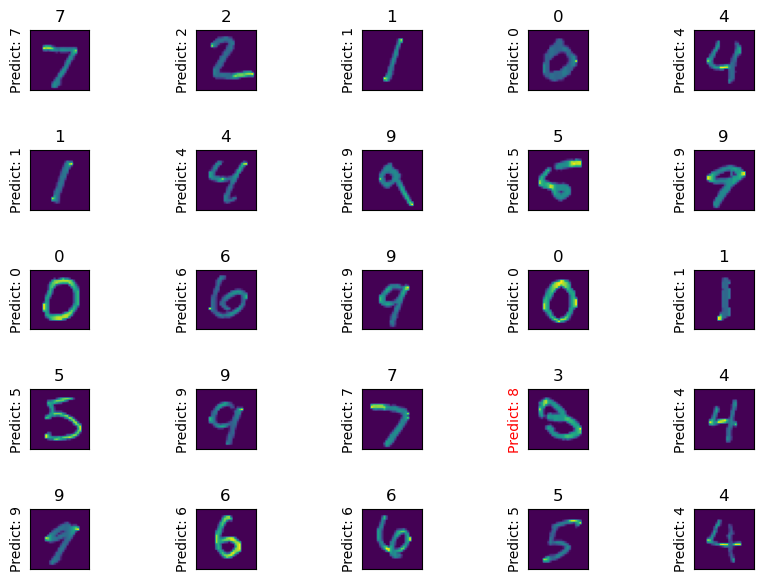

In [71]:
Label_Predict(X_test, y_test, y_pred)